In [2]:
from __future__ import print_function
import keras
import sklearn
# suppress tensorflow compilation warnings
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns


Using TensorFlow backend.


# Data Directory Loading  

In [28]:
import glob
dir_list=glob.glob('data_RV/*.jpg')
num_of_data=len(dir_list)
testratio=0.8
np.random.shuffle(dir_list)
test_dir_list=dir_list[:int(testratio*num_of_data)]
train_dir_list=dir_list[int(testratio*num_of_data):]
np.savetxt('train_dir_list.txt',np.array(train_dir_list), delimiter=',',fmt="%s")
np.savetxt('test_dir_list.txt',np.array(test_dir_list),delimiter=',',fmt="%s")

In [19]:
from keras.preprocessing import image
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

resnet50_feature_list = []

# load model
model = ResNet50(weights="imagenet", include_top=False)
# summarize the model
model.summary()


/Users/Zhijie/anaconda/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
___________________________________________________________________________________________

In [36]:
resnet50_feature_list=[]
for img_path in train_dir_list:
        #print(img_path)
        # process the files under the directory 'dogs' or 'cats'
        # ...
        
        img = image.load_img(img_path, target_size=(224, 224))
        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data)

        resnet50_feature = model.predict(img_data)
        resnet50_feature_np = np.array(resnet50_feature)
        resnet50_feature_list.append(resnet50_feature_np.flatten())
        
train_resnet50_feature_list = np.array(resnet50_feature_list)
np.savetxt('train_resnet50_feature.cvs',train_resnet50_feature_list)
resnet50_feature_list=[] #free some memory


In [88]:
resnet50_feature_list=[]
for img_path in test_dir_list:
        #print(img_path)
        # process the files under the directory 'dogs' or 'cats'
        # ...
        
        img = image.load_img(img_path, target_size=(224, 224))
        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data)

        resnet50_feature = model.predict(img_data)
        resnet50_feature_np = np.array(resnet50_feature)
        resnet50_feature_list.append(resnet50_feature_np.flatten())
        
test_resnet50_feature_list= np.array(resnet50_feature_list)
np.savetxt('test_resnet50_feature.cvs',test_resnet50_feature_list)

In [3]:
#loaded image feature data if the program is interrupted
train_resnet50_feature_list=np.loadtxt('train_resnet50_feature.cvs')
test_resnet50_feature_list=np.loadtxt('test_resnet50_feature.cvs')
train_dir_list=np.loadtxt('train_dir_list.txt',dtype='str')
test_dir_list=np.loadtxt('test_dir_list.txt',dtype='str')

# Histogram of features
the dimension of feature is very large : 100352, thus dimension reduction are required to speed up visualization and clustering algorithm. From the histogram of feauture's value, these values are sparely distributed, thus SVD should works better

(array([9.7556e+04, 2.1350e+03, 5.0600e+02, 1.0700e+02, 2.8000e+01,
        1.1000e+01, 3.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0.      ,  5.012044, 10.024088, 15.036131, 20.048176, 25.060219,
        30.072262, 35.084305, 40.09635 , 45.108395, 50.120438],
       dtype=float32),
 <BarContainer object of 10 artists>)

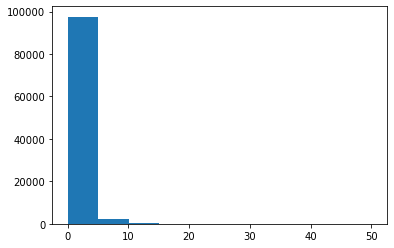

In [48]:
plt.hist(train_resnet50_feature_list[1000])

# Clustering of SVD truncated features

In [4]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, n_iter=20, random_state=42)
train_feature_SVD=svd.fit_transform(train_resnet50_feature_list)
test_feature_SVD=svd.fit_transform(test_resnet50_feature_list)

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(train_feature_SVD)
train_labels=kmeans.labels_
test_labels=kmeans.predict(test_feature_SVD)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.089s...
[t-SNE] Computed neighbors for 1738 samples in 0.553s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 85.284001
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.945694
[t-SNE] KL divergence after 300 iterations: 1.817290
perplexity=30


<Figure size 1152x720 with 0 Axes>

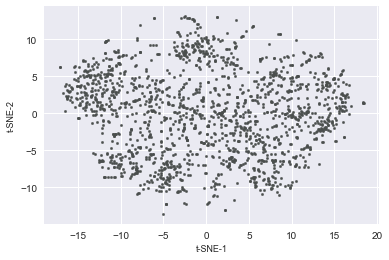

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.007s...
[t-SNE] Computed neighbors for 1738 samples in 0.625s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 90.658938
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.378548
[t-SNE] KL divergence after 300 iterations: 1.594903
perplexity=50


<Figure size 1152x720 with 0 Axes>

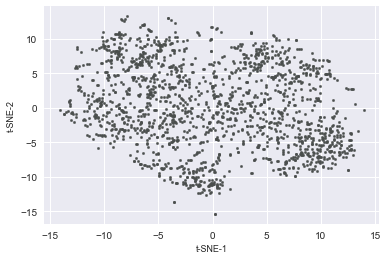

[t-SNE] Computing 211 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.007s...
[t-SNE] Computed neighbors for 1738 samples in 0.605s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 93.822810
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.766861
[t-SNE] KL divergence after 300 iterations: 1.578355
perplexity=70


<Figure size 1152x720 with 0 Axes>

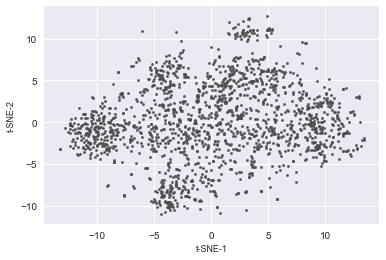

[t-SNE] Computing 271 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.011s...
[t-SNE] Computed neighbors for 1738 samples in 0.668s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 96.621756
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.368927
[t-SNE] KL divergence after 300 iterations: 1.393199
perplexity=90


<Figure size 1152x720 with 0 Axes>

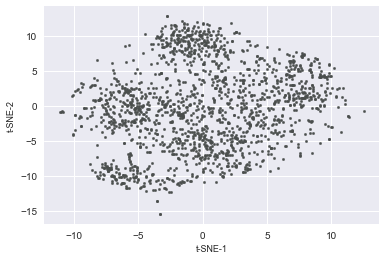

[t-SNE] Computing 331 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.006s...
[t-SNE] Computed neighbors for 1738 samples in 0.773s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 99.004671
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.255356
[t-SNE] KL divergence after 300 iterations: 1.336412
perplexity=110


<Figure size 1152x720 with 0 Axes>

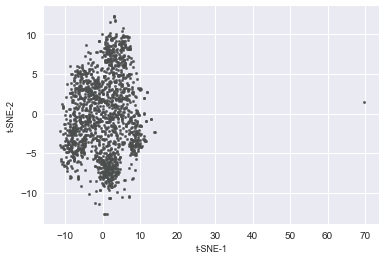

[t-SNE] Computing 391 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.007s...
[t-SNE] Computed neighbors for 1738 samples in 0.743s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 100.564700
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.787514
[t-SNE] KL divergence after 300 iterations: 1.255009
perplexity=130


<Figure size 1152x720 with 0 Axes>

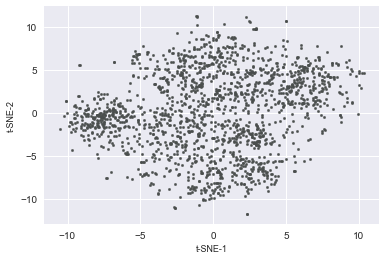

[t-SNE] Computing 451 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.007s...
[t-SNE] Computed neighbors for 1738 samples in 0.797s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 102.488986
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.932823
[t-SNE] KL divergence after 300 iterations: 1.201973
perplexity=150


<Figure size 1152x720 with 0 Axes>

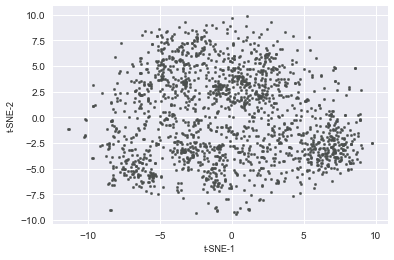

[t-SNE] Computing 511 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.008s...
[t-SNE] Computed neighbors for 1738 samples in 0.778s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 103.682362
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.066620
[t-SNE] KL divergence after 300 iterations: 1.106408
perplexity=170


<Figure size 1152x720 with 0 Axes>

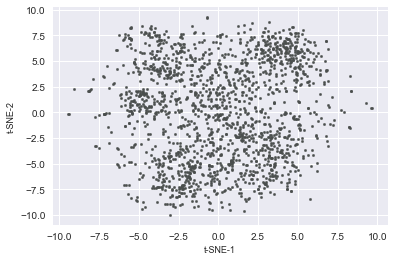

[t-SNE] Computing 571 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.011s...
[t-SNE] Computed neighbors for 1738 samples in 0.994s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 104.752084
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.347298
[t-SNE] KL divergence after 300 iterations: 1.067087
perplexity=190


<Figure size 1152x720 with 0 Axes>

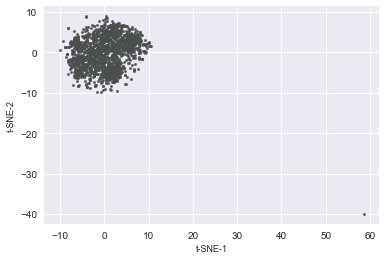

[t-SNE] Computing 631 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.014s...
[t-SNE] Computed neighbors for 1738 samples in 0.942s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 105.727830
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.706081
[t-SNE] KL divergence after 300 iterations: 1.093628
perplexity=210


<Figure size 1152x720 with 0 Axes>

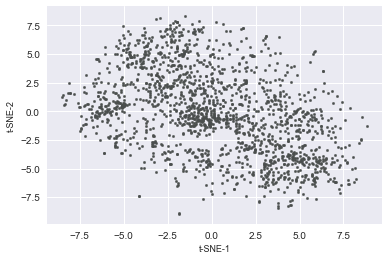

[t-SNE] Computing 691 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.006s...
[t-SNE] Computed neighbors for 1738 samples in 0.843s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 106.631397
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.031601
[t-SNE] KL divergence after 300 iterations: 1.012617
perplexity=230


<Figure size 1152x720 with 0 Axes>

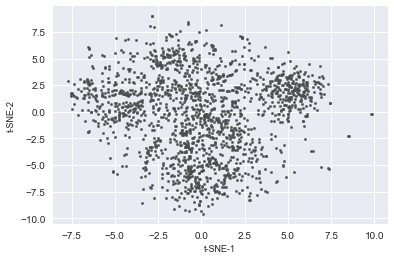

[t-SNE] Computing 751 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.009s...
[t-SNE] Computed neighbors for 1738 samples in 0.959s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 107.477937
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.495541
[t-SNE] KL divergence after 300 iterations: 0.927961
perplexity=250


<Figure size 1152x720 with 0 Axes>

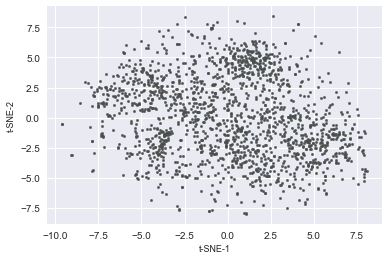

[t-SNE] Computing 811 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.006s...
[t-SNE] Computed neighbors for 1738 samples in 0.843s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 108.278662
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.488056
[t-SNE] KL divergence after 300 iterations: 0.997630
perplexity=270


<Figure size 1152x720 with 0 Axes>

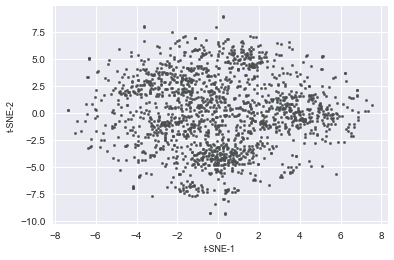

[t-SNE] Computing 871 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.000s...
[t-SNE] Computed neighbors for 1738 samples in 0.319s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 109.042535
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.950729
[t-SNE] KL divergence after 300 iterations: 0.902668
perplexity=290


<Figure size 1152x720 with 0 Axes>

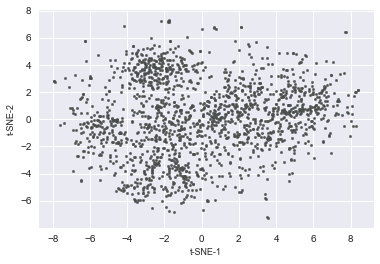

[t-SNE] Computing 931 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.000s...
[t-SNE] Computed neighbors for 1738 samples in 0.270s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 109.776985
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.481438
[t-SNE] KL divergence after 300 iterations: 0.885267
perplexity=310


<Figure size 1152x720 with 0 Axes>

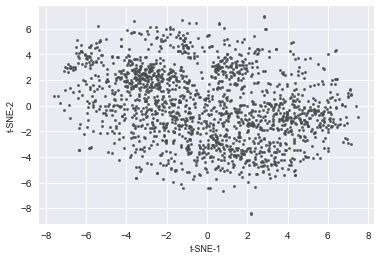

[t-SNE] Computing 991 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.000s...
[t-SNE] Computed neighbors for 1738 samples in 0.263s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 110.487291
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.045998
[t-SNE] KL divergence after 300 iterations: 0.852476
perplexity=330


<Figure size 1152x720 with 0 Axes>

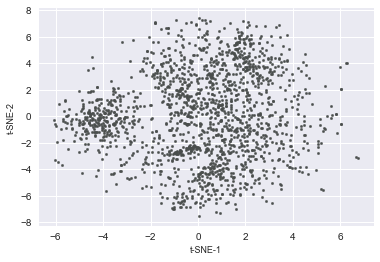

[t-SNE] Computing 1051 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.000s...
[t-SNE] Computed neighbors for 1738 samples in 0.274s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 111.179108
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.743050
[t-SNE] KL divergence after 300 iterations: 0.791314
perplexity=350


<Figure size 1152x720 with 0 Axes>

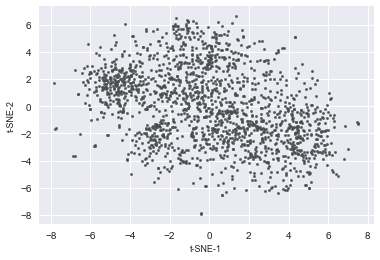

[t-SNE] Computing 1111 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.001s...
[t-SNE] Computed neighbors for 1738 samples in 0.328s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 111.856960
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.726315
[t-SNE] KL divergence after 300 iterations: 0.806602
perplexity=370


<Figure size 1152x720 with 0 Axes>

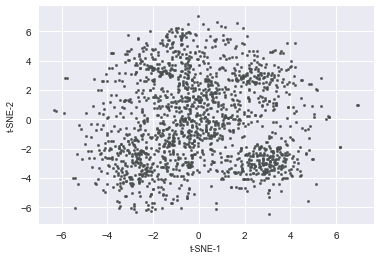

[t-SNE] Computing 1171 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.001s...
[t-SNE] Computed neighbors for 1738 samples in 0.290s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 112.524338
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.449692
[t-SNE] KL divergence after 300 iterations: 0.726462
perplexity=390


<Figure size 1152x720 with 0 Axes>

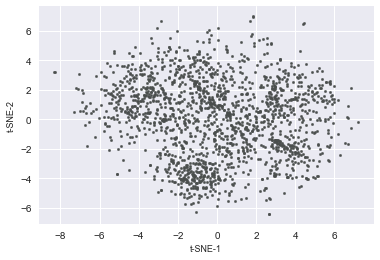

[t-SNE] Computing 1231 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.000s...
[t-SNE] Computed neighbors for 1738 samples in 0.293s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 113.569478
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.263035
[t-SNE] KL divergence after 300 iterations: 0.764060
perplexity=410


<Figure size 1152x720 with 0 Axes>

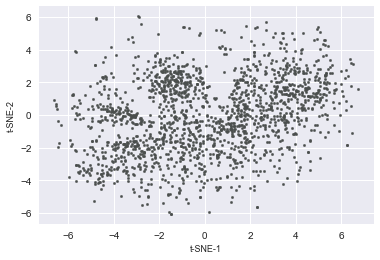

[t-SNE] Computing 1291 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.001s...
[t-SNE] Computed neighbors for 1738 samples in 0.313s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 115.929388
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.895336
[t-SNE] KL divergence after 300 iterations: 0.656890
perplexity=430


<Figure size 1152x720 with 0 Axes>

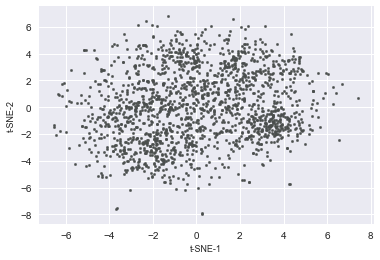

[t-SNE] Computing 1351 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.000s...
[t-SNE] Computed neighbors for 1738 samples in 0.319s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 116.625142
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.505386
[t-SNE] KL divergence after 300 iterations: 0.634767
perplexity=450


<Figure size 1152x720 with 0 Axes>

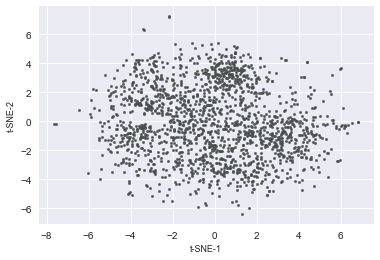

[t-SNE] Computing 1411 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.000s...
[t-SNE] Computed neighbors for 1738 samples in 0.364s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 117.324299
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.201187
[t-SNE] KL divergence after 300 iterations: 0.648915
perplexity=470


<Figure size 1152x720 with 0 Axes>

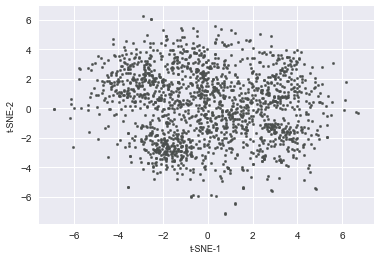

[t-SNE] Computing 1471 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.000s...
[t-SNE] Computed neighbors for 1738 samples in 0.337s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 118.030398
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.860626
[t-SNE] KL divergence after 300 iterations: 0.609677
perplexity=490


<Figure size 1152x720 with 0 Axes>

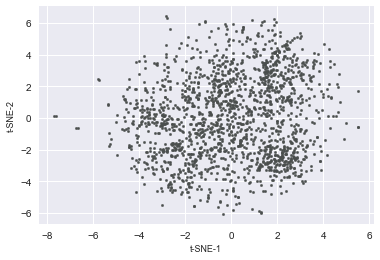

[t-SNE] Computing 1531 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.001s...
[t-SNE] Computed neighbors for 1738 samples in 0.378s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 119.678431
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.890388
[t-SNE] KL divergence after 300 iterations: 0.588111
perplexity=510


<Figure size 1152x720 with 0 Axes>

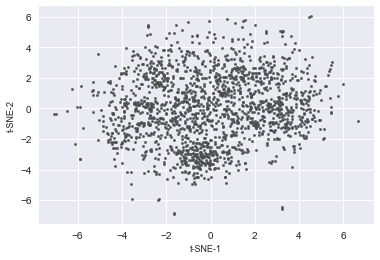

[t-SNE] Computing 1591 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.000s...
[t-SNE] Computed neighbors for 1738 samples in 0.370s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 123.474804
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.378014
[t-SNE] KL divergence after 300 iterations: 0.630167
perplexity=530


<Figure size 1152x720 with 0 Axes>

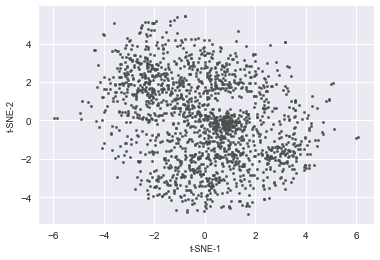

[t-SNE] Computing 1651 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.000s...
[t-SNE] Computed neighbors for 1738 samples in 0.377s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 124.308882
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.208992
[t-SNE] KL divergence after 300 iterations: 0.604189
perplexity=550


<Figure size 1152x720 with 0 Axes>

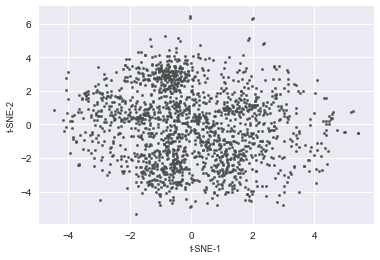

[t-SNE] Computing 1711 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.001s...
[t-SNE] Computed neighbors for 1738 samples in 0.466s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 125.162964
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.904438
[t-SNE] KL divergence after 300 iterations: 0.534626
perplexity=570


<Figure size 1152x720 with 0 Axes>

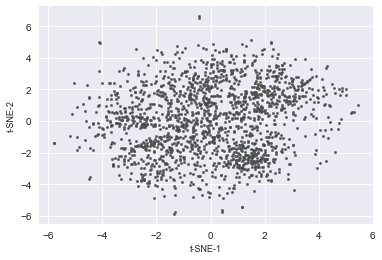

[t-SNE] Computing 1737 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.000s...
[t-SNE] Computed neighbors for 1738 samples in 0.381s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 126.028123
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.290405
[t-SNE] KL divergence after 300 iterations: 0.550332
perplexity=590


<Figure size 1152x720 with 0 Axes>

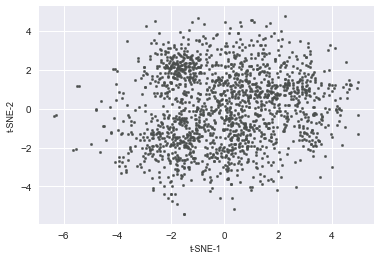

[t-SNE] Computing 1737 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.000s...
[t-SNE] Computed neighbors for 1738 samples in 0.382s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 126.891848
[t-SNE] KL divergence after 250 iterations with early exaggeration: 40.731865
[t-SNE] KL divergence after 300 iterations: 0.534177
perplexity=610


<Figure size 1152x720 with 0 Axes>

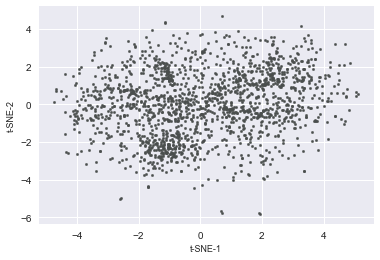

[t-SNE] Computing 1737 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.000s...
[t-SNE] Computed neighbors for 1738 samples in 0.375s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 127.754407
[t-SNE] KL divergence after 250 iterations with early exaggeration: 40.716145
[t-SNE] KL divergence after 300 iterations: 0.551450
perplexity=630


<Figure size 1152x720 with 0 Axes>

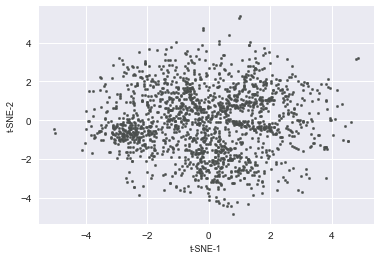

[t-SNE] Computing 1737 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.000s...
[t-SNE] Computed neighbors for 1738 samples in 0.370s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 128.616671
[t-SNE] KL divergence after 250 iterations with early exaggeration: 40.050056
[t-SNE] KL divergence after 300 iterations: 0.520673
perplexity=650


<Figure size 1152x720 with 0 Axes>

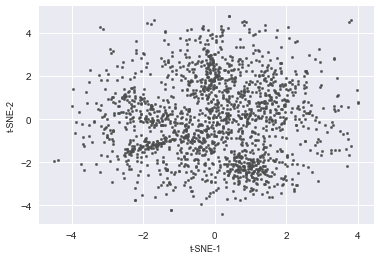

[t-SNE] Computing 1737 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.000s...
[t-SNE] Computed neighbors for 1738 samples in 0.363s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 129.479728
[t-SNE] KL divergence after 250 iterations with early exaggeration: 39.722416
[t-SNE] KL divergence after 300 iterations: 0.466952
perplexity=670


<Figure size 1152x720 with 0 Axes>

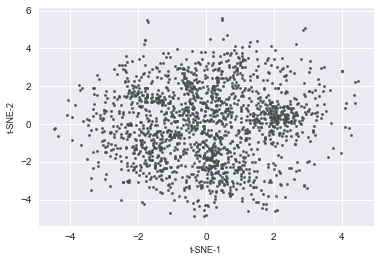

[t-SNE] Computing 1737 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.001s...
[t-SNE] Computed neighbors for 1738 samples in 0.370s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 130.344316
[t-SNE] KL divergence after 250 iterations with early exaggeration: 39.470272
[t-SNE] KL divergence after 300 iterations: 0.460471
perplexity=690


<Figure size 1152x720 with 0 Axes>

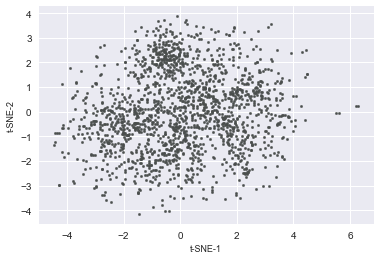

[t-SNE] Computing 1737 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.001s...
[t-SNE] Computed neighbors for 1738 samples in 0.389s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 131.211341
[t-SNE] KL divergence after 250 iterations with early exaggeration: 39.209290
[t-SNE] KL divergence after 300 iterations: 0.464413
perplexity=710


<Figure size 1152x720 with 0 Axes>

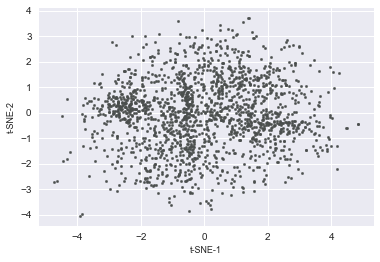

[t-SNE] Computing 1737 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.000s...
[t-SNE] Computed neighbors for 1738 samples in 0.412s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 132.081710
[t-SNE] KL divergence after 250 iterations with early exaggeration: 38.808128
[t-SNE] KL divergence after 300 iterations: 0.447167
perplexity=730


<Figure size 1152x720 with 0 Axes>

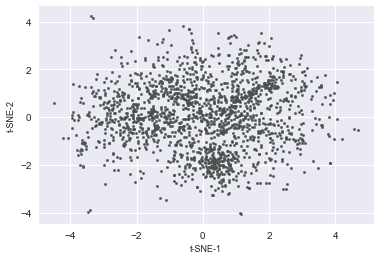

[t-SNE] Computing 1737 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.000s...
[t-SNE] Computed neighbors for 1738 samples in 0.439s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 132.956290
[t-SNE] KL divergence after 250 iterations with early exaggeration: 38.941063
[t-SNE] KL divergence after 300 iterations: 0.443686
perplexity=750


<Figure size 1152x720 with 0 Axes>

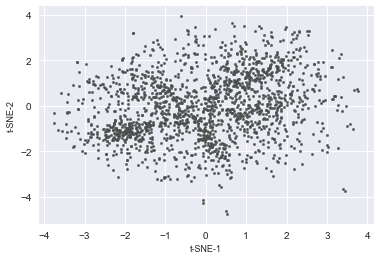

[t-SNE] Computing 1737 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.000s...
[t-SNE] Computed neighbors for 1738 samples in 0.374s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 133.835830
[t-SNE] KL divergence after 250 iterations with early exaggeration: 38.404102
[t-SNE] KL divergence after 300 iterations: 0.428203
perplexity=770


<Figure size 1152x720 with 0 Axes>

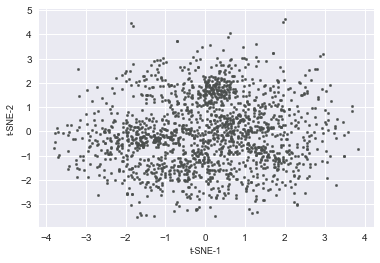

[t-SNE] Computing 1737 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.000s...
[t-SNE] Computed neighbors for 1738 samples in 0.405s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 134.721298
[t-SNE] KL divergence after 250 iterations with early exaggeration: 38.106594
[t-SNE] KL divergence after 300 iterations: 0.385750
perplexity=790


<Figure size 1152x720 with 0 Axes>

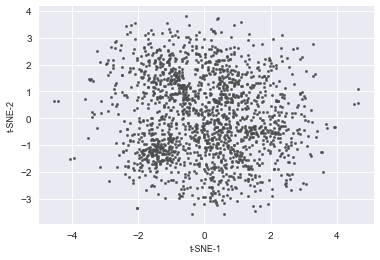

[t-SNE] Computing 1737 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.000s...
[t-SNE] Computed neighbors for 1738 samples in 0.356s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 135.613320
[t-SNE] KL divergence after 250 iterations with early exaggeration: 37.823181
[t-SNE] KL divergence after 300 iterations: 0.383846
perplexity=810


<Figure size 1152x720 with 0 Axes>

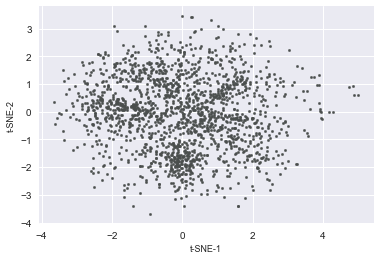

[t-SNE] Computing 1737 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.000s...
[t-SNE] Computed neighbors for 1738 samples in 0.379s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 136.512806
[t-SNE] KL divergence after 250 iterations with early exaggeration: 37.478027
[t-SNE] KL divergence after 300 iterations: 0.376317
perplexity=830


<Figure size 1152x720 with 0 Axes>

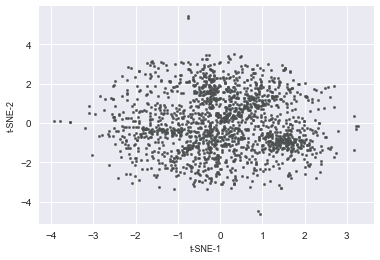

[t-SNE] Computing 1737 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.001s...
[t-SNE] Computed neighbors for 1738 samples in 0.406s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 137.420766
[t-SNE] KL divergence after 250 iterations with early exaggeration: 37.231216
[t-SNE] KL divergence after 300 iterations: 0.368057
perplexity=850


<Figure size 1152x720 with 0 Axes>

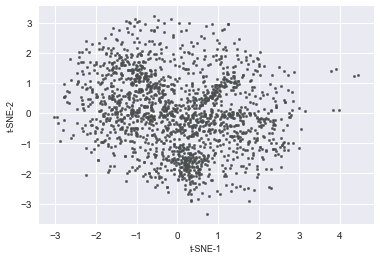

[t-SNE] Computing 1737 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.000s...
[t-SNE] Computed neighbors for 1738 samples in 0.385s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 138.337810
[t-SNE] KL divergence after 250 iterations with early exaggeration: 36.983448
[t-SNE] KL divergence after 300 iterations: 0.356445
perplexity=870


<Figure size 1152x720 with 0 Axes>

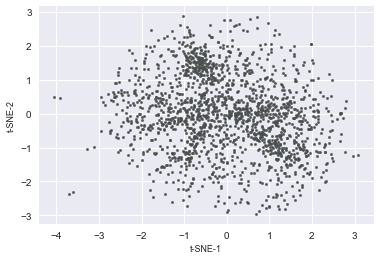

[t-SNE] Computing 1737 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.001s...
[t-SNE] Computed neighbors for 1738 samples in 0.751s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 139.265098
[t-SNE] KL divergence after 250 iterations with early exaggeration: 36.751839
[t-SNE] KL divergence after 300 iterations: 0.344027
perplexity=890


<Figure size 1152x720 with 0 Axes>

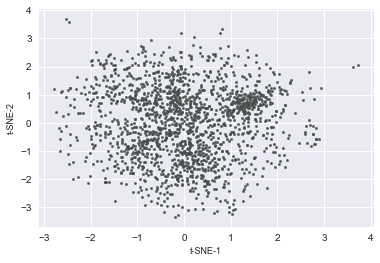

[t-SNE] Computing 1737 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.000s...
[t-SNE] Computed neighbors for 1738 samples in 0.474s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 140.203256
[t-SNE] KL divergence after 250 iterations with early exaggeration: 36.524639
[t-SNE] KL divergence after 300 iterations: 0.349393
perplexity=910


<Figure size 1152x720 with 0 Axes>

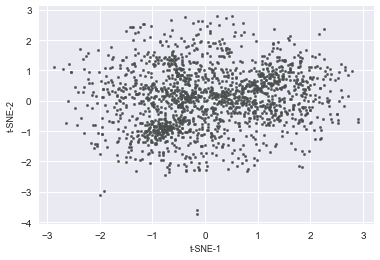

[t-SNE] Computing 1737 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.001s...
[t-SNE] Computed neighbors for 1738 samples in 0.606s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 141.153458
[t-SNE] KL divergence after 250 iterations with early exaggeration: 36.304653
[t-SNE] KL divergence after 300 iterations: 0.318666
perplexity=930


<Figure size 1152x720 with 0 Axes>

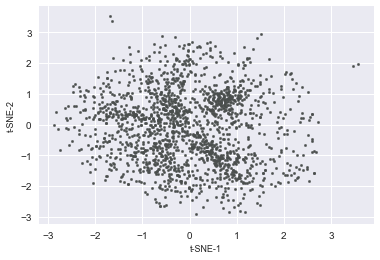

[t-SNE] Computing 1737 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.000s...
[t-SNE] Computed neighbors for 1738 samples in 0.422s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 142.116562
[t-SNE] KL divergence after 250 iterations with early exaggeration: 36.088394
[t-SNE] KL divergence after 300 iterations: 0.318551
perplexity=950


<Figure size 1152x720 with 0 Axes>

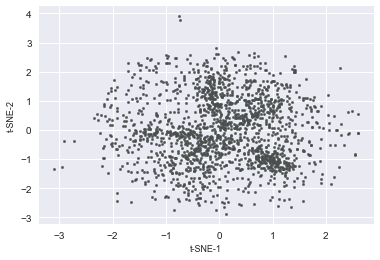

[t-SNE] Computing 1737 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.000s...
[t-SNE] Computed neighbors for 1738 samples in 0.393s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 143.093562
[t-SNE] KL divergence after 250 iterations with early exaggeration: 35.878155
[t-SNE] KL divergence after 300 iterations: 0.293410
perplexity=970


<Figure size 1152x720 with 0 Axes>

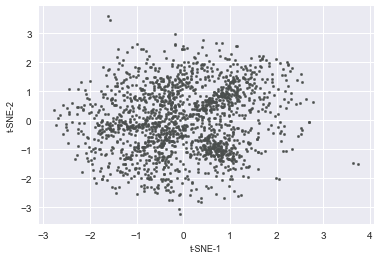

[t-SNE] Computing 1737 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.001s...
[t-SNE] Computed neighbors for 1738 samples in 0.401s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 144.085600
[t-SNE] KL divergence after 250 iterations with early exaggeration: 35.675606
[t-SNE] KL divergence after 300 iterations: 0.293366
perplexity=990


<Figure size 1152x720 with 0 Axes>

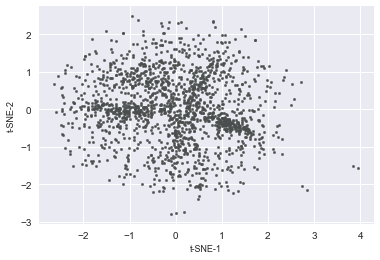

In [89]:
#choose a visually more appealing visualization
from sklearn.manifold import TSNE
from bioinfokit.visuz import cluster
for perp in range(30,1000,20):
    feature_embedded = TSNE(n_components=2,verbose=1, perplexity=perp, n_iter=300).fit_transform(train_feature_SVD)
    plt.figure(figsize=(16,10))
    from bioinfokit.visuz import cluster
    print("perplexity="+str(perp))
    cluster.tsneplot(score=feature_embedded,show=True)

# tSNE visualization

[t-SNE] Computing 991 nearest neighbors...
[t-SNE] Indexed 1738 samples in 0.001s...
[t-SNE] Computed neighbors for 1738 samples in 0.460s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1738
[t-SNE] Computed conditional probabilities for sample 1738 / 1738
[t-SNE] Mean sigma: 110.487304
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.587425
[t-SNE] KL divergence after 300 iterations: 0.797597


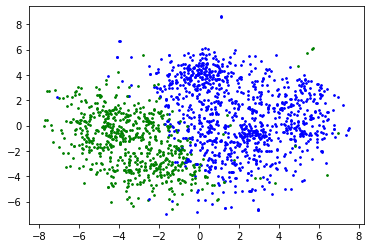

In [34]:
from sklearn.manifold import TSNE
feature_embedded = TSNE(n_components=2,verbose=1, perplexity=330, n_iter=300).fit_transform(train_feature_SVD)
for i in range(len(feature_embedded)):
    if train_labels[i]:
        c='b'
    else: 
        c='green'
    plt.scatter(feature_embedded[i][0],feature_embedded[i][1],c=c,s=3)


In [39]:
print(sum(kmeans.labels_))
print(len(kmeans.labels_))
print(sum(test_labels))
print(len(test_labels))

1071
1738
4310
6951


In [33]:
print(len(train_labels))

1738


# Text preprocessing and vectorization
Since we want to preserve more information from the ID, here n-gram of charater is chosen to expand the ID to text. Then it can be fed into standard text-preprocessing functions.

In [13]:
def ngram(string,n):
    return [string[i:i+n] for i in range(len(string)-n+1)]

# Function to convert   
def listToString(s):  
    # initialize an empty string 
    str1 = ""  
    # traverse in the string   
    for ele in s:  
        str1 += ele +' '  
    # return string   
    return str1  

train_IDtoken=[]
test_IDtoken=[]
for string in train_dir_list:    
    string=string[8:-4]
    string=string[:-5]+string[-4:]
    #print(string)
    train_IDtoken.append(listToString(ngram(string,1)+ngram(string,2)))

for string in test_dir_list:    
    string=string[8:-4]
    string=string[:-5]+string[-4:]
    #print(string)
    test_IDtoken.append(listToString(ngram(string,1)+ngram(string,2)))
    

# Training a classifier with ID as input
Now we have the label of the ID obtained from the clustering, and we want the network to maximize the probability of getting the label from the ID. This is a text classification problem. The first layner of the network need to vectorize the data. 


In [40]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(train_IDtoken+test_IDtoken)
#vectorizer.vocabulary_

X_train = vectorizer.transform(train_IDtoken)
X_test  = vectorizer.transform(test_IDtoken)
X_train=X_train.toarray()
X_test=X_test.toarray()

In [15]:
#blind guess gives 0.5 probability:
Blind=0
import random
for i in range(len(test_labels)):
    if int(random.random()+0.5)==test_labels[i]:Blind+=1
print(Blind/len(test_labels)) 


0.49805783340526544


# Baseline model: logistic regression

Text(0, 0.5, 'accuracy')

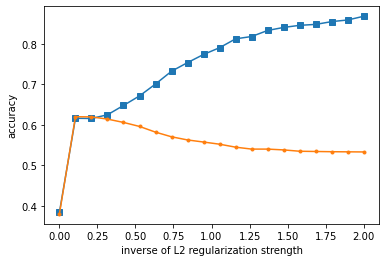

In [74]:

from sklearn.linear_model import LogisticRegression
accuracy_train=[]
accuracy_test=[]
clist=np.linspace(0.001,2,20)
for c in clist:
    classifier = LogisticRegression(penalty='l1',solver='liblinear',C=c)
    classifier.fit(X_train, train_labels)
    accuracy_train.append(classifier.score(X_train, train_labels))
    accuracy_test.append(classifier.score(X_test, test_labels))
plt.plot(clist,accuracy_train,marker='s')
plt.plot(clist,accuracy_test,marker='.')
plt.xlabel("inverse of L2 regularization strength")
plt.ylabel("accuracy")

In [90]:
print(sum(test_labels))
print(sum(test_labels)/len(test_labels))
accuracy_test[1]

4310
0.620054668393037


0.620054668393037

# Another baseline model: support vector machine

Text(0, 0.5, 'accuracy')

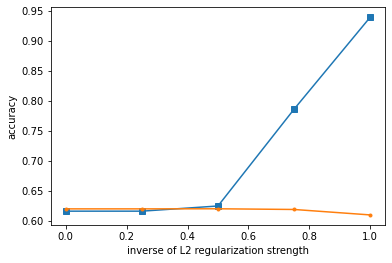

In [43]:
#support vector machine
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

accuracy_train=[]
accuracy_test=[]
clist=np.linspace(0.00001,1,5)
for c in clist:
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto',C=c))
    clf.fit(X_train, train_labels)
    #clf.score(X_test, test_labels)
    accuracy_test.append(clf.score(X_test, test_labels))
    accuracy_train.append(clf.score(X_train, train_labels))
    
plt.plot(clist,accuracy_train,marker='s')
plt.plot(clist,accuracy_test,marker='.')
plt.xlabel("inverse of L2 regularization strength")
plt.ylabel("accuracy")


In [28]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(
        input_dim=len(vectorizer.vocabulary_),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy'
          , mode='max')
callbacks=[es]
history = model.fit(X_train, train_labels
                    , batch_size=20
                    , epochs=2
                    , validation_split=0.2
                    , callbacks=callbacks)

model.evaluate(X_test, test_labels)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          65408     
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 139,777
Trainable params: 139,777
Non-trainable params: 0
_________________________________________________________________
Train on 1390 samples, validate on 348 samples
Epoch 1/2
1390/1390 [==============================] - 499s 359ms/sample - loss: 0.8594 - accuracy: 0.5050 - val_loss: 0.6675 - val_accuracy: 0.5948
Epoch 2/2
1390/1390 [==============================]

[0.6711881409496082, 0.59991366]

I stopped the program from higher Epoch due to limited computer storage, but the second Epoch gives accuracy: 0.6173 - val_loss: 0.6691 - val_accuracy: 0.5977, which is already better than random guessing.

# Conlusion
All three models for text classification gives similar result. The accuracy is around 60%, which is better than random guessing that gives 50%. However, the number of samples in the larger class among two classes is also 60%, and the classifier simply choose to label all samples from the test dataset with larger cluster. It means that we do not have evidence that information in the text that correlate to the picture itself. It could be also the case that our simple kmenas 2-cluster partition is not a good enough image feature classifier. However, the result still represent a trivial strategy of seemingly "successful" remote view, that one always guessing some common features of the pictures that is ambiguise but correct for most pictures.